# Especialização em Ciência de Dados - PUC-Rio
# Machine Learning
## Problemas de Regressão

# Importação dos dados

http://lib.stat.cmu.edu/datasets/boston

Para este projeto, investigaremos o dataset Boston House Price, um dataset para problemas de regressão em que todos os atributos são numéricos.

Cada registro no banco de dados descreve um subúrbio ou cidade de Boston. Os dados foram retirados da Área Estatística Metropolitana Padrão de Boston (SMSA) em 1970. Os atributos são definidos da seguinte forma (retirado do UCI Machine Learning Repository):

1. CRIM: Taxa de criminalidade per capita por cidade
2. ZN: Proporção de terrenos residenciais divididos em lotes com mais de 25.000 pés quadrados
3. INDUS: Proporção de acres não comerciais por cidade
4. CHAS: Variável fictícia CHAS Charles River (= 1 se o trecho limita o rio; 0 caso contrário)
5. NOX: Concentração de óxidos nítricos (partes por 10 milhões)
6. RM: número médio de quartos por habitação
7. AGE: proporção de unidades ocupadas construídas antes de 1940
8. DIS: Distâncias ponderadas para cinco centros de emprego em Boston
9. RAD: Índice de acessibilidade às rodovias radiais
10. TAX: Taxa de imposto sobre o valor total da propriedade por 10 mil dólares
11. PTRATIO: Proporção de alunos por professor por cidade
12. B: 1000(Bk - 0.63)^2 onde Bk é a proporção de negros por cidade
13. LSTAT: % do menor status da população
14. MEDV: Valor médio das casas ocupadas pelos proprietários em mil dólares

Podemos ver que os atributos de entrada têm uma mistura de unidades.

In [0]:
# Datasets do scikit-learn: https://scikit-learn.org/stable/datasets/index.html

# Importação de pacotes
import pandas as pd
import numpy as np
from sklearn import datasets

# Carrega o dataset boston
boston = datasets.load_boston()

# Extraindo X, Y e os nomes das colunas dos atributos
X = boston["data"]
Y = boston["target"]
names = boston["feature_names"]

# Se precisar converter para dataframe
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


# Modelos de Regressão

Para avaliar cada algoritmo, iremos usar diversas métricas, dentre elas, a medida de erro quadrático médio (MSE). Na implementação do scikit-learn, os valores médios dos erros quadráticos estão invertidos (negativos), devido a uma peculiaridade da função usada (para mais detalhes, consulte a documentação).

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

https://scikit-learn.org/stable/modules/model_evaluation.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [0]:
# Import dos pacotes
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### Treinamento e avaliação do modelo
def treinarAvaliarModeloRegressao (modelo):
  
    # Seed ou semente: pode ser qualquer número, e garante que os resultados possam ser reproduzidos de forma idêntica toda vez que o script for rodado. 
    # Isto é muito importante quando trabalhamos com modelos ou métodos que utilizam de algum tipo de aleatoriedade.
    seed = 7
    
    ## 1. Usando validação cruzada

    print("=== Usando validação cruzada ===")

    # Definição do número de folds 
    num_folds = 10
    
    # Definindo os folds
    kfold = KFold(num_folds, True, random_state = seed)

    # Aplicação do modelo e cálculo dos resultados
    resultado = cross_validate(modelo, X, Y, cv = kfold,
                            scoring=('neg_mean_squared_error', 'r2'), # neg_mean_squared_error virá com valor negativo!
                            return_train_score=True)

    print("RMSE de treino: ", np.sqrt(abs(resultado['train_neg_mean_squared_error'].mean())) )
    print("RMSE de teste: ", np.sqrt(abs(resultado['test_neg_mean_squared_error'].mean())) )
    print("MSE de treino: ", resultado['train_neg_mean_squared_error'].mean() )
    print("MSE de teste: ", resultado['test_neg_mean_squared_error'].mean() )
    print("R2 de treino: ", resultado['train_r2'].mean() )
    print("R2 de teste: ", resultado['test_r2'].mean() )
    print("\n")

    ## 2. Usando conjuntos de treino e teste em vez de validação cruzada
    
    print("=== Usando particionamento treino-teste ===")
    
    # Definição do tamanho do conjunto de teste para 33%
    teste_size = 0.33

    # Criando os conjuntos de dados de treino e de teste
    X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

    # Treinamento
    modeloTreinado = modelo.fit(X_treino, Y_treino)

    # Previsões
    Y_pred = modeloTreinado.predict(X_teste)

    # Resultados
    corretas = (Y_teste == Y_pred).sum()
    total = Y_teste.shape[0]
    
    # Print dos resultados 
    print("RMSE de teste: ", np.sqrt(metrics.mean_squared_error(Y_teste, Y_pred)))
    print("MSE de teste: ", metrics.mean_squared_error(Y_teste, Y_pred))
    print("R2 de teste: ", metrics.r2_score(Y_teste, Y_pred))
    
    return;

  
### Impressão dos coeficientes (para regressão linear)
def imprimirCoeficientes (modelo):
    # Impressão dos coeficientes (intercept e slope)
    print("Beta0: ", modelo.intercept_)
    print("\n")
    coeff_df = pd.DataFrame(modelo.coef_, names, columns=['Coeficientes'])  
    print(coeff_df)
    print("\n")
    
    return;

## Regressão Linear

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

A regressão linear pressupõe que as variáveis de entrada tenham uma distribuição gaussiana. Também é assumido que as variáveis de entrada são relevantes para a variável de saída e que não são altamente correlacionadas entre si. Podemos construir um modelo de regressão linear usando a classe LinearRegression.

In [0]:
# Import da função
from sklearn.linear_model import LinearRegression

# Escolhendo o modelo
modelo = LinearRegression()

# Treinamento e avaliação do modelo
treinarAvaliarModeloRegressao(modelo)
print("\n")
imprimirCoeficientes(modelo)

=== Usando validação cruzada ===
RMSE de treino:  4.66883016698375
RMSE de teste:  4.873038252601078
MSE de treino:  -21.797975128137516
MSE de teste:  -23.746501811313365
R2 de treino:  0.7417692439965816
R2 de teste:  0.7181683241114103


=== Usando particionamento treino-teste ===
RMSE de teste:  5.032127524575092
MSE de teste:  25.32230742358624
R2 de teste:  0.6663089606572568


Beta0:  24.6495548658218


         Coeficientes
CRIM        -0.109873
ZN           0.025843
INDUS        0.009282
CHAS         2.590511
NOX        -15.639798
RM           5.350326
AGE         -0.014098
DIS         -1.307287
RAD          0.269510
TAX         -0.011260
PTRATIO     -0.968767
B            0.010029
LSTAT       -0.386575




Isto significa que para o aumento de uma unidade em NOX há uma diminuição de 15.63 no target, e que para a diminuição de uma unidade em CHAS, há um aumento em 2.59 no target.

## Regressão Ridge

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

A regressão Ridge é uma extensão da regressão linear em que a função de perda é modificada para minimizar a complexidade do modelo medido como a soma do valor ao quadrado dos valores do coeficiente (também chamado de norma L2). Podemos construir um modelo de regressão Ridge usando a classe Ridge.

In [0]:
from sklearn.linear_model import Ridge

modelo = Ridge()

# Treinamento e avaliação do modelo
treinarAvaliarModeloRegressao(modelo)
print("\n")
imprimirCoeficientes(modelo)

=== Usando validação cruzada ===
RMSE de treino:  4.687047665576289
RMSE de teste:  4.88772853021252
MSE de treino:  -21.96841581938414
MSE de teste:  -23.88989018505344
R2 de treino:  0.7397462418961597
R2 de teste:  0.716092748999703


=== Usando particionamento treino-teste ===
RMSE de teste:  5.079243301210836
MSE de teste:  25.79871251289515
R2 de teste:  0.6600310134409777


Beta0:  18.809734112178386


         Coeficientes
CRIM        -0.109709
ZN           0.027939
INDUS       -0.021965
CHAS         2.525037
NOX         -7.845890
RM           5.423987
AGE         -0.019643
DIS         -1.184205
RAD          0.253371
TAX         -0.012005
PTRATIO     -0.869945
B            0.010187
LSTAT       -0.395127




## Regressão LASSO

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

A regressão LASSO (Least Absolute Shrinkage and Selection Operator) é uma modificação da regressão linear em que a função de perda é modificada para minimizar a complexidade do modelo medido como a soma do valor absoluto dos valores de coeficiente (também chamado a norma L1). Podemos construir um modelo LASSO usando a classe Lasso.

In [0]:
from sklearn.linear_model import Lasso

modelo = Lasso()

# Treinamento e avaliação do modelo
treinarAvaliarModeloRegressao(modelo)
print("\n")
imprimirCoeficientes(modelo)

=== Usando validação cruzada ===
RMSE de treino:  5.168851691637753
RMSE de teste:  5.361519381280976
MSE de treino:  -26.717027810146465
MSE de teste:  -28.74589007585154
R2 de treino:  0.6833717306814954
R2 de teste:  0.6620846823996761


=== Usando particionamento treino-teste ===
RMSE de teste:  4.898615578574049
MSE de teste:  23.99643458664836
R2 de teste:  0.6837809815751457


Beta0:  30.662179808858333


         Coeficientes
CRIM        -0.032079
ZN           0.033424
INDUS       -0.000000
CHAS         0.000000
NOX         -0.000000
RM           2.314710
AGE          0.023226
DIS         -0.428535
RAD          0.244641
TAX         -0.015521
PTRATIO     -0.697395
B            0.007468
LSTAT       -0.671867




## Regressão ElasticNet

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

O ElasticNet é um método de regularização de regressão que combina as propriedades da regressão de Ridge e da regressão LASSO. Ele procura minimizar a complexidade do modelo de regressão (magnitude e número de coeficientes de regressão) penalizando o modelo usando a norma L2 (soma dos valores do coeficiente ao quadrado) e a norma L1 (soma dos valores absolutos do coeficiente). Podemos construir um modelo ElasticNet usando a classe ElasticNet.

In [0]:
from sklearn.linear_model import ElasticNet

modelo = ElasticNet()

# Treinamento e avaliação do modelo
treinarAvaliarModeloRegressao(modelo)
print("\n")
imprimirCoeficientes(modelo)

=== Usando validação cruzada ===
RMSE de treino:  5.139987442511225
RMSE de teste:  5.282842072240193
MSE de treino:  -26.419470909173082
MSE de teste:  -27.908420360231055
R2 de treino:  0.6869761153286654
R2 de teste:  0.6707573051925824


=== Usando particionamento treino-teste ===
RMSE de teste:  4.8045884826654515
MSE de teste:  23.0840704877615
R2 de teste:  0.6958038876762297


Beta0:  39.173320396182206


         Coeficientes
CRIM        -0.061006
ZN           0.044829
INDUS       -0.021688
CHAS         0.000000
NOX         -0.000000
RM           1.389340
AGE          0.028021
DIS         -0.596196
RAD          0.308559
TAX         -0.017516
PTRATIO     -0.751238
B            0.006934
LSTAT       -0.733593




## K-Nearest Neighbors

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

O KNN localiza as k instâncias mais semelhantes no
conjunto de dados de treinamento para uma nova instância de dados. Dos k vizinhos, a variável de saída média ou mediana é tomada como a previsão. É importante notar a métrica da distância usada (o argumento da métrica). A distância de Minkowski é usada por padrão, que é uma generalização da distância euclidiana (usada quando todas as entradas têm a mesma escala) e da distância de Manhattan (usada quando as escalas das variáveis de entrada diferem). Podemos  construir um modelo KNN para regressão usando a classe KNeighborsRegressor.

In [0]:
from sklearn.neighbors import KNeighborsRegressor

modelo = KNeighborsRegressor()

# Print dos parâmetros do modelo
print(modelo.get_params)
print("\n")

# Treinamento e avaliação do modelo
treinarAvaliarModeloRegressao(modelo)

<bound method BaseEstimator.get_params of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')>


=== Usando validação cruzada ===
RMSE de treino:  4.948155477065862
RMSE de teste:  6.233162942412678
MSE de treino:  -24.484242625216886
MSE de teste:  -38.852320266666666
R2 de treino:  0.7097378290240509
R2 de teste:  0.5094444355002923


=== Usando particionamento treino-teste ===
RMSE de teste:  5.872843214759755
MSE de teste:  34.490287425149695
R2 de teste:  0.5454956112171632


## Árvores de Decisão

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

As árvores de decisão ou as Árvores de Classificação e Regressão (CART, como são conhecidas) usam os dados de treinamento para selecionar os melhores pontos para dividir os dados, a fim de minimizar uma métrica de custo. A métrica de custo padrão para árvores de decisão de regressão é o erro médio quadrático, especificado no parâmetro critério. Podemos criar um modelo CART para regressão usando a classe DecisionTreeRegressor.

In [0]:
from sklearn.tree import DecisionTreeRegressor

modelo = DecisionTreeRegressor()

# Print dos parâmetros do modelo
print(modelo.get_params)
print("\n")

# Treinamento e avaliação do modelo
treinarAvaliarModeloRegressao(modelo)

<bound method BaseEstimator.get_params of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')>


=== Usando validação cruzada ===
RMSE de treino:  0.0
RMSE de teste:  4.830216615123964
MSE de treino:  0.0
MSE de teste:  -23.33099254901961
R2 de treino:  1.0
R2 de teste:  0.7015464705789144


=== Usando particionamento treino-teste ===
RMSE de teste:  4.693791287084098
MSE de teste:  22.03167664670659
R2 de teste:  0.709672070727053


## Support Vector Machines

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

O modelo SVM foi desenvolvido inicialmente para classificação binária e depois estendido para os problemas de predição de valor real e denominado Support Vector Regression (SVR). Podemos criar um modelo SVM para regressão usando a classe SVR.

In [0]:
from sklearn.svm import SVR

modelo = SVR(gamma='auto')

# Print dos parâmetros do modelo
print(modelo.get_params)
print("\n")

# Treinamento e avaliação do modelo
treinarAvaliarModeloRegressao(modelo)

<bound method BaseEstimator.get_params of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>


=== Usando validação cruzada ===
RMSE de treino:  8.47863932064203
RMSE de teste:  9.150558886796565
MSE de treino:  -71.88732472953714
MSE de teste:  -83.73272794073159
R2 de treino:  0.14847067230564637
R2 de teste:  0.0019497717923192214


=== Usando particionamento treino-teste ===
RMSE de teste:  8.71880830440189
MSE de teste:  76.01761824890737
R2 de teste:  -0.0017411769596671345


# Comparação de Modelos

Vamos criar uma função para comparar diversos modelos de regressão.

In [0]:
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
 
# Lista de modelos a avaliar
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR(gamma="auto")))

def comparaModelos(X, Y, models):
  
  # Treinamento e avaliação de cada modelo
  results = []
  names = []  
  scoring = 'neg_mean_squared_error' # Virá com valor negativo!
  for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    # imprime MSE, desvio padrão do MSE e RMSE
    msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, cv_results.mean(), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    print(msg)

  # Comparação dos algoritmos em boxplot
  fig = pyplot.figure()
  fig.suptitle('Comparação dos Algoritmos')
  ax = fig.add_subplot(111)
  pyplot.boxplot(results)
  ax.set_xticklabels(names)
  pyplot.show()
  return;

Aplicando a função...

LinearRegression: MSE -34.71 (45.57) - RMSE 5.89
Ridge: MSE -34.08 (45.90) - RMSE 5.84
Lasso: MSE -34.46 (27.89) - RMSE 5.87
ElasticNet: MSE -31.16 (22.71) - RMSE 5.58
KNN: MSE -107.29 (79.84) - RMSE 10.36
CART: MSE -41.62 (31.48) - RMSE 6.45
SVM: MSE -91.05 (71.10) - RMSE 9.54


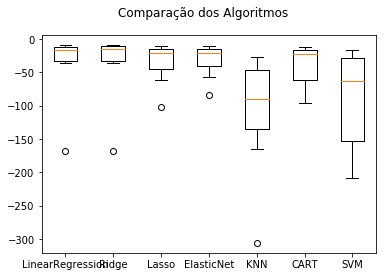

In [0]:
comparaModelos(X, Y, models)

*OBS: se neste caso estivéssemos usando a métrica r2 em vez da neg_mean_squared_error, possivelmente terímos valores negativos, uma vez que estamos usando cross validation e os dados não estão padronizados, sendo possível que a média dos dados de treino seja muito diferente da média dos dados de teste. A padronização dos dados neste caso resolveria este problema, gerando r2 entre 0 e 1.*

Vamos agora verificar se a padronização de dados tem algum efeito nos resultados dos modelos, executando a mesma função, porém, padronizando os dados de X antes (uma boa prática!).

LinearRegression: MSE -34.71 (45.57) - RMSE 5.89
Ridge: MSE -34.55 (45.42) - RMSE 5.88
Lasso: MSE -37.87 (40.59) - RMSE 6.15
ElasticNet: MSE -37.30 (36.08) - RMSE 6.11
KNN: MSE -28.59 (25.46) - RMSE 5.35
CART: MSE -39.05 (31.42) - RMSE 6.25
SVM: MSE -38.52 (37.92) - RMSE 6.21


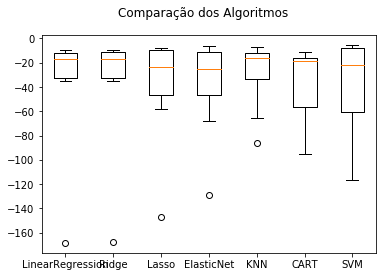

In [0]:
# Import das funções
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Padronização dos dados
scaler = StandardScaler().fit(X)
X_padronizado = scaler.transform(X)

comparaModelos(X_padronizado, Y, models)

# Tuning Automático de Hiperparâmetros



Podemos avaliar de forma fácil diversas variações de parâmetros de algoritmos usando a função GridSearchCV. Para tal, vamos criar uma função de tuning que recebe um modelo e um conjunto de parâmetros. Esta função irá imprimir o modelo com o melhor resultado.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/grid_search.html

In [0]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV

def tuningHiperparametros(nome, modelo, param_grid):

  scoring = 'neg_mean_squared_error' # Virá com valor negativo!
  
  # Definição do número de folds 
  num_folds = 10
  seed = 7
    
  # Definindo os folds
  kfold = KFold(num_folds, True, random_state = seed)

  # Avaliação de todas as combinações
  grid = GridSearchCV(estimator=modelo, param_grid=param_grid, scoring=scoring, cv=kfold,
      iid=True)
  grid.fit(X_padronizado, Y)

  # Imprime o modelo com o melhor resultado
  print("Modelo %s - Melhor com %s" % (nome, grid.best_params_)) 
  melhorModelo = grid.best_estimator_
  
  return melhorModelo;

Modelo Ridge - Melhor com {'alpha': 10}
Modelo Lasso - Melhor com {'alpha': 0.01}
Modelo ElasticNet - Melhor com {'alpha': 0.01}
Modelo KNN - Melhor com {'metric': 'manhattan', 'n_neighbors': 3}
Modelo CART - Melhor com {'criterion': 'mse', 'max_depth': 30, 'min_samples_leaf': 3}
Modelo SVM - Melhor com {'C': 2.0, 'kernel': 'rbf'}


LinearRegression: MSE -34.71 (45.57) - RMSE 5.89
Ridge: MSE -33.48 (44.07) - RMSE 5.79
Lasso: MSE -34.55 (45.60) - RMSE 5.88
ElasticNet: MSE -34.30 (45.23) - RMSE 5.86
KNN: MSE -28.73 (27.49) - RMSE 5.36
CART: MSE -35.68 (28.98) - RMSE 5.97
SVM: MSE -31.55 (32.87) - RMSE 5.62


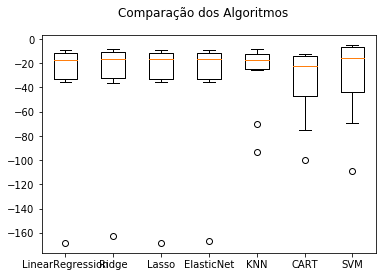

In [0]:
# Definição dos possíveis valores de hiperparâmetros para os Regressores Ridge, Lasso e ElasticNet
alphas = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 50, 100]

# Ridge
param_gridRidge = dict(alpha=alphas)
# Avaliação de todas as combinações e impressão dos resultados
melhorModeloRidge = tuningHiperparametros("Ridge", Ridge(), param_gridRidge)

# Lasso
param_gridLasso = dict(alpha=alphas)
# Avaliação de todas as combinações e impressão dos resultados
melhorModeloLasso = tuningHiperparametros("Lasso", Lasso(), param_gridLasso)

# ElasticNet
param_gridElasticNet = dict(alpha=alphas)
# Avaliação de todas as combinações e impressão dos resultados
melhorModeloElasticNet = tuningHiperparametros("ElasticNet", ElasticNet(), param_gridElasticNet)

# KNN
# Definição dos possíveis valores de hiperparâmetros
k = [1,3,5,7,9,11,13,15,17,19,21]
distancias = ["euclidean", "manhattan", "minkowski"]
param_gridKNN = dict(n_neighbors=k, metric=distancias)
# Avaliação de todas as combinações e impressão dos resultados
melhorModeloKNN = tuningHiperparametros("KNN", KNeighborsRegressor(), param_gridKNN)

# CART
# Definição dos possíveis valores de hiperparâmetros
criterios = ['mse', 'mae']
max_depth = [3,5,10,20,30,40,50]
min_samples_leaf = [3,5,10,20,30,40,50]
param_gridCART = dict(criterion=criterios, min_samples_leaf=min_samples_leaf, max_depth=max_depth)
# Avaliação de todas as combinações e impressão dos resultados
melhorModeloCART = tuningHiperparametros("CART", DecisionTreeRegressor(), param_gridCART)

# SVR
# Definição dos possíveis valores de hiperparâmetros
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_gridSVR = dict(C=c_values, kernel=kernel_values)
# Avaliação de todas as combinações e impressão dos resultados
melhorModeloSVR = tuningHiperparametros("SVM", SVR(gamma='auto'), param_gridSVR)

models2 = []
models2.append(('LinearRegression', LinearRegression())) # Não há muito o que variar
models2.append(('Ridge', melhorModeloRidge))
models2.append(('Lasso', melhorModeloLasso))
models2.append(('ElasticNet', melhorModeloElasticNet))
models2.append(('KNN', melhorModeloKNN))
models2.append(('CART', melhorModeloCART))
models2.append(('SVM', melhorModeloSVR))

print("\n")

comparaModelos(X_padronizado, Y, models2)